# POC-Turtle-6: Tests
This is a continuation of proof-of-concept (POC) experiments in unsupervised language learning (ULL), the SingularityNET project hosted on [GitHub]*(https://github.com/singnet/language-learning/tree/master/notebooks).  
This notebook contains updated tests for [Grammar Learner v.0.3 2018-04-12](http://88.99.210.144/data/clustering_2018/html/Grammar-Learner-3-2018-04-12.html).

## Basic settings

In [1]:
import os, sys, time
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from IPython.display import display
module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path: sys.path.append(module_path)
from src.utl.utl import UTC
from src.utl.read_files import check_dir
from src.grammar_learner.poc03 import learn_grammar

input_dir = module_path + '/data/POC-Turtle/MST_fixed_manually/'
print('Baseline dataset:\n-', input_dir)
batch_dir = module_path + '/output/POC-Turtle-6-Tests-' + str(UTC())[:10] + '/'
print('Output data directory (batch_dir):\n-', batch_dir)
prefix = '' # unused option
tmpath = module_path + '/tmp/' # dir for tmp files
check_dir(tmpath, True, 'none')
print(UTC())

Baseline dataset:
- /home/oleg/language-learning/data/POC-Turtle/MST_fixed_manually/
Output data directory (batch_dir):
- /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/
2018-04-25 15:48:42 UTC


## Grammar Learner parameters

In [2]:
def test_learn_grammar(input_dir, prj_dir, left_wall, period, context, word_space, \
                       dim_reduction, clustering, grammar_rules, verbose = 'none'):
    # Directory to read parse files (1 to many input files)
    #^input_dir = module_path + '/data/POC_Turtle/mst_fixed_manually/'
    # Paths to store learned categories, learned dictionary Link Grammar file
    if check_dir(prj_dir, create=True, verbose='none'):
        cat_path = prj_dir  # Path to store learned categories
        dict_path = prj_dir # Path to store learned dictionary Link Grammar file
    # Settings:
    parse_mode = 'given'        # 'given' (default) / 'explosive' (next)
    #^left_wall = 'LEFT-WALL'     # '','none' / 'ABC' - replace ###LEFT-WALL### with ABC
    #^period = True               # use period in links learning: True/False
    #^context = 1                 # 1: connectors / 0: 'words' /
    #^context = 2               # 2,3...: disjuncts with limited number of links
    window = 'mst'              # 'mst' / reserved options for «explosive» parsing
    weighting = 'ppmi'          # 'ppmi' / future options
    group = True                # group items after link parsing, sum counts 
    #^word_space = 'vectors'      # 'vectors' - dimensionality reduction with SVM
    #^word_space = 'discrete'     #  'discrete' - no dimensionality reduction
    dim_max = 100               # max vector space dimensionality
    sv_min = 0.1                # minimal singular value (fraction of the max value)
    #^dim_reduction = 'svm'     # 'svm' / 'none' (discrete word_space, group)
    #^dim_reduction = 'none'
    #^clustering = 'kmeans'     # 'kmeans' / 'group' / future options
    #^clustering = 'group'      # grouping identical lexical entries
    cluster_range = (2,48,1)    # min, max, step
    cluster_criteria = 'silhouette'
    cluster_level = 0.9         # level = 0, 1, 0.-0.99..: 0 - max number of clusters
    generalization = 'off'      # 'off' / future options: 'cosine', ...
    merge = 0.8                 # merge clusters with similarity > this 'merge' criteria
    aggregate = 0.2             # agglomerate clusters with similarity > this criteria
    #^grammar_rules = 2           # 1: 'connectors' / 2 - 'disjuncts' / 0 - 'words' (TODO?)
    #^verbose='mid'               # 'none', 'min', 'mid', 'max'
    
    rules = learn_grammar(input_dir, cat_path, dict_path, tmpath, verbose, \
        parse_mode, left_wall, period, context, window, weighting, group, \
        word_space, dim_max, sv_min, dim_reduction, \
        clustering, cluster_range, cluster_criteria, cluster_level,
        generalization, merge, aggregate, grammar_rules)
    
    return rules  # .dict ⇒ string

print(UTC())

2018-04-25 15:48:50 UTC


# Integration test «Connectors - DRK - disjuncts»  
- Word space context terms - connectors;  
- DRK - dimensionality reduction (SVM) and K-means clustering;  
- Link Grammar rules based on disjuncts. - 

In [3]:
context = 1                 # 1: connectors / 2: disjuncts /
word_space = 'vectors'      # 'vectors' - dimensionality reduction with SVM
dim_reduction = 'svm'       # 'svm' / 'none' (discrete word_space, group)
clustering = 'kmeans'       # 'kmeans' / 'group' / future options
generalization = 'off'      # 'off' / future options: 'cosine', ...
grammar_rules = 2           # 1: connectors / 2 - disjuncts
verbose = 'mid'

## LEFT-WALL and period (full stop)

/home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW+dot+/
15 unique words and 28 unique links form 64 unique word-link pairs from 64 parsed items


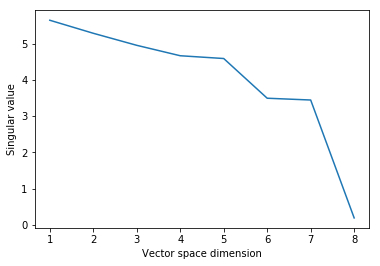

Vector space dimensionality = 7
Singular value (7) = 3.4
Max singular value (1) = 5.6
Singular value (7) = 0.19275911971807783
/poc03/category_learner: number of clusters = 4


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['.', 'LEFT-WALL', 'has', 'isa']","[0, 0, 0, 0]"
C00,C02,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C03,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"



Category list - 4 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW+dot+/4_categories.txt
15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items


Cluster,Germs,L,R,Disjuncts
C01,"['.', 'LEFT-WALL', 'has', 'isa']",[],[],"['C01C03+', 'C01C04+', 'C02C01-', 'C03C01-', 'C03C01- & C01C02+', 'C03C01- & C01C03+', 'C04C01- & C01C02+', 'C04C01- & C01C03+']"
C02,"['bird', 'extremity', 'fish']",[],[],['C01C02- & C02C01+']
C03,"['feather', 'fin', 'scale', 'wing']",[],[],['C01C03- & C03C01+']
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],['C01C04- & C04C01+']


In [4]:
left_wall = 'LEFT-WALL'
period = True
subdir = 'connectors-DRK-disjuncts_LW+dot+/'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
print(prj_dir)
tmpath = prj_dir
verbose = 'mid'
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)

In [5]:
#-print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

In [6]:
print(rules)

% Grammar Learner v.0.8 2018-04-25 15:49:00 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"." "LEFT-WALL" "has" "isa":
(C01C03+) or (C01C04+) or (C02C01-) or (C03C01-) or (C03C01- & C01C02+) or (C03C01- & C01C03+) or (C04C01- & C01C02+) or (C04C01- & C01C03+);

% C02
"bird" "extremity" "fish":
(C01C02- & C02C01+);

% C03
"feather" "fin" "scale" "wing":
(C01C03- & C03C01+);

% C04
"eagle" "herring" "parrot" "tuna":
(C01C04- & C04C01+);

UNKNOWN-WORD: XXX+;

% 4 word clusters, 4 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW+dot+/poc-turtle_4C_2018-04-25_0008.4.0.dict


_C02, C03, C04 rules demand C01 words on both sides:  
-- would crash on sentences without LEFT-WALL or period,  
-- would not always parse longer sentences.  
The following case (no LEFT-WALL, no period) looks much more relevant..._

## No LEFT-WALL, no period

13 unique words and 17 unique links form 38 unique word-link pairs from 38 parsed items


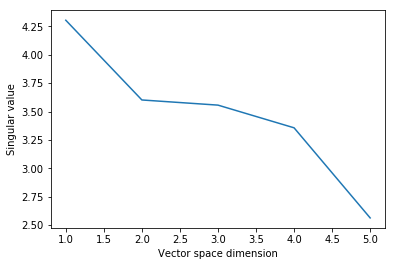

Vector space dimensionality = 5
Singular value (5) = 2.6
Max singular value (1) = 4.3
All singular values within relevance interval - more than 0.1 of max singular value
/poc03/category_learner: number of clusters = 4


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['has', 'isa']","[0, 0]"
C00,C02,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C03,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"



Category list - 4 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW-dot-/4_categories.txt
13 unique words and 16 unique links form 31 unique word-link pairs from 36 parsed items


Cluster,Germs,L,R,Disjuncts
C01,"['has', 'isa']",[],[],"['C03C01- & C01C02+', 'C03C01- & C01C03+', 'C04C01- & C01C02+', 'C04C01- & C01C03+']"
C02,"['bird', 'extremity', 'fish']",[],[],['C01C02-']
C03,"['feather', 'fin', 'scale', 'wing']",[],[],"['C01C03-', 'C03C01+']"
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],['C04C01+']


In [7]:
left_wall = ''
period = False
subdir = 'connectors-DRK-disjuncts_LW-dot-/'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
#-print(prj_dir)
tmpath = prj_dir
verbose = 'mid'
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
if verbose in ['min','none']: 
    print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

In [8]:
if verbose not in ['none']: print(rules)

% Grammar Learner v.0.8 2018-04-25 15:49:28 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"has" "isa":
(C03C01- & C01C02+) or (C03C01- & C01C03+) or (C04C01- & C01C02+) or (C04C01- & C01C03+);

% C02
"bird" "extremity" "fish":
(C01C02-);

% C03
"feather" "fin" "scale" "wing":
(C01C03-) or (C03C01+);

% C04
"eagle" "herring" "parrot" "tuna":
(C04C01+);

UNKNOWN-WORD: XXX+;

% 4 word clusters, 4 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW-dot-/poc-turtle_4C_2018-04-25_0008.4.0.dict


# Integration test «Disjuncts - ILE - disjuncts»   
- Word space context terms - disjuncts;  
- ILE - grouping identical lexical entries;  
- Link Grammar rules based on disjuncts.

## LEFT-WALL and period

In [20]:
left_wall = 'LEFT-WALL'
period = True
subdir = 'disjuncts-ILE-disjuncts_LW+dot+/'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
tmpath = prj_dir
#-print(prj_dir)
verbose = 'mid'
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
if verbose in ['min','none']: 
    print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items
Total 8 clusters of identical lexical entries <class 'pandas.core.frame.DataFrame'>


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,['.'],[0]
C00,C02,0.0,['LEFT-WALL'],[0]
C00,C03,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C04,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C05,0.0,"['feather', 'scale']","[0, 0]"
C00,C06,0.0,"['fin', 'wing']","[0, 0]"
C00,C07,0.0,['has'],[0]
C00,C08,0.0,['isa'],[0]



Category list - 8 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/disjuncts-ILE-disjuncts_LW+dot+/8_categories.txt


Cluster,Germs,L,R,Disjuncts
C01,['.'],[],[],"['C03C01-', 'C05C01-', 'C06C01-']"
C02,['LEFT-WALL'],[],[],"['C02C04+', 'C02C06+']"
C03,"['bird', 'extremity', 'fish']",[],[],['C08C03- & C03C01+']
C04,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C02C04- & C04C07+', 'C02C04- & C04C08+']"
C05,"['feather', 'scale']",[],[],['C07C05- & C05C01+']
C06,"['fin', 'wing']",[],[],"['C02C06- & C06C07+', 'C02C06- & C06C08+', 'C07C06- & C06C01+']"
C07,['has'],[],[],"['C04C07- & C07C06+', 'C06C07- & C07C05+']"
C08,['isa'],[],[],"['C04C08- & C08C03+', 'C06C08- & C08C03+']"


In [21]:
if verbose not in ['none']: print(rules)

% Grammar Learner v.0.8 2018-04-25 06:18:48 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
".":
(C03C01-) or (C05C01-) or (C06C01-);

% C02
"LEFT-WALL":
(C02C04+) or (C02C06+);

% C03
"bird" "extremity" "fish":
(C08C03- & C03C01+);

% C04
"eagle" "herring" "parrot" "tuna":
(C02C04- & C04C07+) or (C02C04- & C04C08+);

% C05
"feather" "scale":
(C07C05- & C05C01+);

% C06
"fin" "wing":
(C02C06- & C06C07+) or (C02C06- & C06C08+) or (C07C06- & C06C01+);

% C07
"has":
(C04C07- & C07C06+) or (C06C07- & C07C05+);

% C08
"isa":
(C04C08- & C08C03+) or (C06C08- & C08C03+);

UNKNOWN-WORD: XXX+;

% 8 word clusters, 8 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/disjuncts-ILE-disjuncts_LW+dot+/poc-turtle_8C_2018-04-25_0008.4.0.dict


## No LEFT-WALL, no period

In [22]:
context = 2                     # 1: connectors / 2+: 'dusjuncts'
word_space = 'discrete'         # grouping identical context sets
dim_reduction = 'none'          # grouping identical context sets
clustering = 'group'            # grouping identical context sets
grammar_rules = 2               # 1: connectors / 2+: 'dusjuncts'
subdir = 'disjuncts-ILE-disjuncts_LW-dot-/'
left_wall = ''
period = False
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
tmpath = prj_dir
#-print(prj_dir)
verbose = 'mid'
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
if verbose in ['min','none']: 
    print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

13 unique words and 16 unique links form 31 unique word-link pairs from 36 parsed items
Total 6 clusters of identical lexical entries <class 'pandas.core.frame.DataFrame'>


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C02,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C03,0.0,"['feather', 'scale']","[0, 0]"
C00,C04,0.0,"['fin', 'wing']","[0, 0]"
C00,C05,0.0,['has'],[0]
C00,C06,0.0,['isa'],[0]



Category list - 6 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/disjuncts-ILE-disjuncts_LW-dot-/6_categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['bird', 'extremity', 'fish']",[],[],['C06C01-']
C02,"['eagle', 'herring', 'parrot', 'tuna']",[],[],"['C02C05+', 'C02C06+']"
C03,"['feather', 'scale']",[],[],['C05C03-']
C04,"['fin', 'wing']",[],[],"['C04C05+', 'C04C06+', 'C05C04-']"
C05,['has'],[],[],"['C02C05- & C05C04+', 'C04C05- & C05C03+']"
C06,['isa'],[],[],"['C02C06- & C06C01+', 'C04C06- & C06C01+']"


In [23]:
if verbose not in ['none']: print(rules)

% Grammar Learner v.0.8 2018-04-25 06:19:06 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"bird" "extremity" "fish":
(C06C01-);

% C02
"eagle" "herring" "parrot" "tuna":
(C02C05+) or (C02C06+);

% C03
"feather" "scale":
(C05C03-);

% C04
"fin" "wing":
(C04C05+) or (C04C06+) or (C05C04-);

% C05
"has":
(C02C05- & C05C04+) or (C04C05- & C05C03+);

% C06
"isa":
(C02C06- & C06C01+) or (C04C06- & C06C01+);

UNKNOWN-WORD: XXX+;

% 6 word clusters, 6 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/disjuncts-ILE-disjuncts_LW-dot-/poc-turtle_6C_2018-04-25_0008.4.0.dict


# Integration test «Disjuncts - DRK - disjuncts»  
- Word space context terms - disjuncts;  
- DRK - dimensionality reduction (SVM) and K-means clustering;  
- Link Grammar rules based on disjuncts. - 

In [28]:
context = 2                 # 1: connectors / 2: disjuncts /
word_space = 'vectors'      # 'vectors' - dimensionality reduction with SVM
dim_reduction = 'svm'       # 'svm' / 'none' (discrete word_space, group)
clustering = 'kmeans'       # 'kmeans' / 'group' / future options
generalization = 'off'      # 'off' / future options: 'cosine', ...
grammar_rules = 2           # 1: connectors / 2 - disjuncts
verbose = 'mid'

## LEFT-WALL and period (full stop)

15 unique words and 29 unique links form 44 unique word-link pairs from 60 parsed items


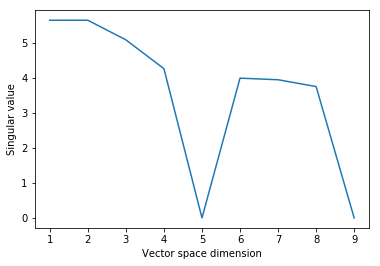

Vector space dimensionality = 8
Singular value (8) = 3.7
Max singular value (1) = 5.6
Singular value (8) = 3.7385588793217883e-10
/poc03/category_learner: number of clusters = 4


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['.', 'LEFT-WALL', 'has', 'isa']","[0, 0, 0, 0]"
C00,C02,0.0,"['eagle', 'herring', 'parrot', 'tuna']","[0, 0, 0, 0]"
C00,C03,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"
C00,C04,0.0,"['feather', 'fin', 'scale', 'wing']","[0, 0, 0, 0]"



Category list - 4 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW+dot+/4_categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['.', 'LEFT-WALL', 'has', 'isa']",[],[],"['C01C02+', 'C01C04+', 'C02C01- & C01C03+', 'C02C01- & C01C04+', 'C03C01-', 'C04C01-', 'C04C01- & C01C03+', 'C04C01- & C01C04+']"
C02,"['eagle', 'herring', 'parrot', 'tuna']",[],[],['C01C02- & C02C01+']
C03,"['bird', 'extremity', 'fish']",[],[],['C01C03- & C03C01+']
C04,"['feather', 'fin', 'scale', 'wing']",[],[],['C01C04- & C04C01+']


In [29]:
left_wall = 'LEFT-WALL'
period = True
subdir = 'connectors-DRK-disjuncts_LW+dot+'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
tmpath = prj_dir
#-print(prj_dir)
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
if verbose in ['min','none']:
    print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

In [31]:
if verbose not in ['none']: print(rules)

% Grammar Learner v.0.8 2018-04-25 06:19:57 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"." "LEFT-WALL" "has" "isa":
(C01C02+) or (C01C04+) or (C02C01- & C01C03+) or (C02C01- & C01C04+) or (C03C01-) or (C04C01-) or (C04C01- & C01C03+) or (C04C01- & C01C04+);

% C02
"eagle" "herring" "parrot" "tuna":
(C01C02- & C02C01+);

% C03
"bird" "extremity" "fish":
(C01C03- & C03C01+);

% C04
"feather" "fin" "scale" "wing":
(C01C04- & C04C01+);

UNKNOWN-WORD: XXX+;

% 4 word clusters, 4 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW+dot+/poc-turtle_4C_2018-04-25_0008.4.0.dict


## No LEFT-WALL, no period

13 unique words and 16 unique links form 31 unique word-link pairs from 36 parsed items


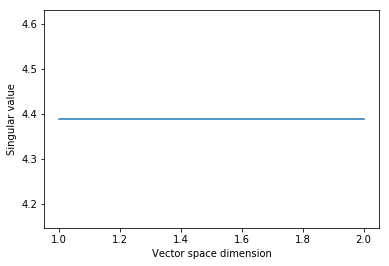

Vector space dimensionality = 2
Singular value (2) = 4.4
Max singular value (1) = 4.4
All singular values within relevance interval - more than 0.1 of max singular value
/poc03/category_learner: number of clusters = 4


Parent,Category,Quality,Words,Relevance
C00,C01,0.0,"['eagle', 'fin', 'herring', 'parrot', 'tuna', 'wing']","[0, 0, 0, 0, 0, 0]"
C00,C02,0.0,['isa'],[0]
C00,C03,0.0,"['feather', 'has', 'scale']","[0, 0, 0]"
C00,C04,0.0,"['bird', 'extremity', 'fish']","[0, 0, 0]"



Category list - 4 lines, saved to /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW-dot-/4_categories.txt


Cluster,Germs,L,R,Disjuncts
C01,"['eagle', 'fin', 'herring', 'parrot', 'tuna', 'wing']",[],[],"['C01C02+', 'C01C03+', 'C03C01-']"
C02,['isa'],[],[],['C01C02- & C02C04+']
C03,"['feather', 'has', 'scale']",[],[],"['C01C03- & C03C01+', 'C01C03- & C03C03+', 'C03C03-']"
C04,"['bird', 'extremity', 'fish']",[],[],['C02C04-']


In [34]:
left_wall = ''
period = False
subdir = 'connectors-DRK-disjuncts_LW-dot-/'
prj_dir = batch_dir + 'MST_fixed_manually/' + subdir
tmpath = prj_dir
#-print(prj_dir)
verbose = 'mid'
rules = test_learn_grammar(input_dir, prj_dir, left_wall, period, \
    context, word_space, dim_reduction, clustering, grammar_rules, verbose)
if verbose in ['min','none']:
    print('LG rules file saved to ..'+rules.split('\n')[-1][63:])

In [35]:
if verbose not in ['none']: print(rules)

% Grammar Learner v.0.8 2018-04-25 06:24:25 UTC
<dictionary-version-number>: V0v0v8+;
<dictionary-locale>: EN4us+;

% C01
"eagle" "fin" "herring" "parrot" "tuna" "wing":
(C01C02+) or (C01C03+) or (C03C01-);

% C02
"isa":
(C01C02- & C02C04+);

% C03
"feather" "has" "scale":
(C01C03- & C03C01+) or (C01C03- & C03C03+) or (C03C03-);

% C04
"bird" "extremity" "fish":
(C02C04-);

UNKNOWN-WORD: XXX+;

% 4 word clusters, 4 Link Grammar rules.
% Link Grammar file saved to: /home/oleg/language-learning/output/POC-Turtle-6-Tests-2018-04-25/MST_fixed_manually/connectors-DRK-disjuncts_LW-dot-/poc-turtle_4C_2018-04-25_0008.4.0.dict
